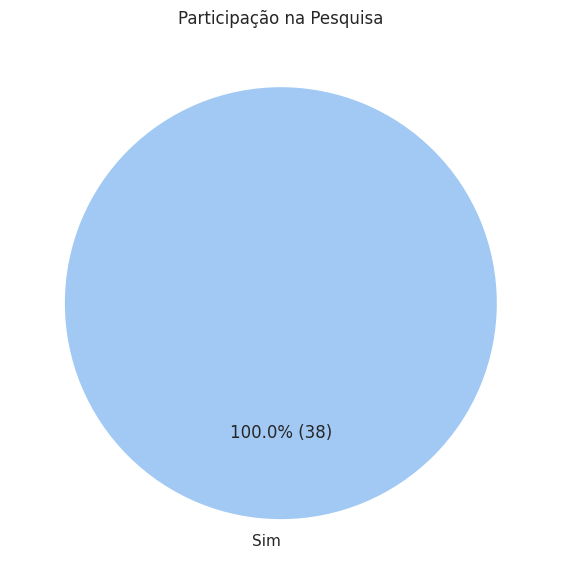

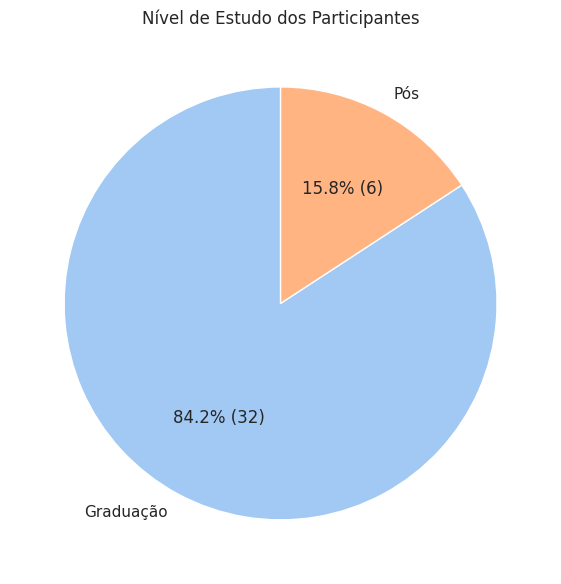

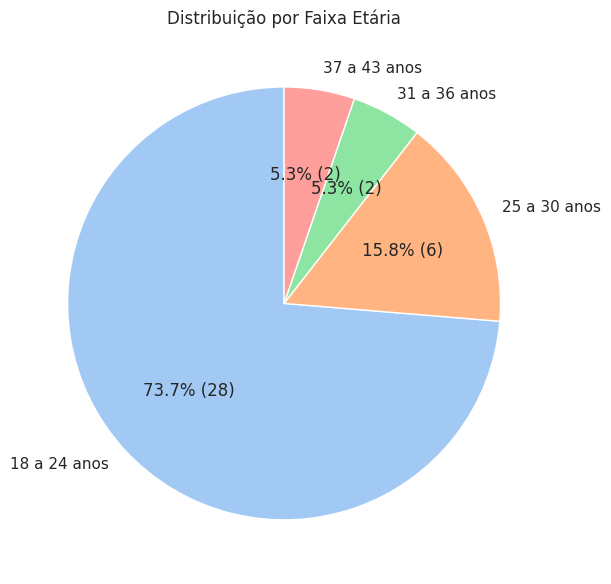

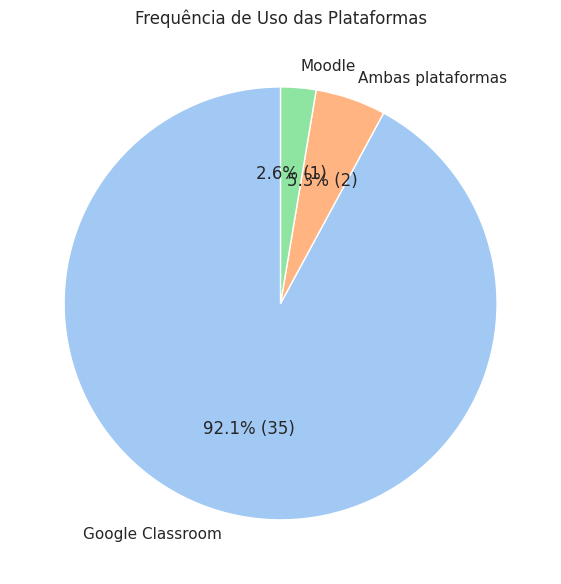

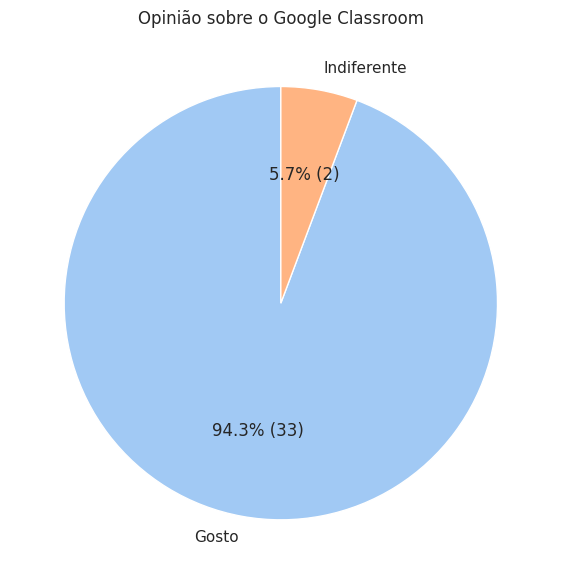

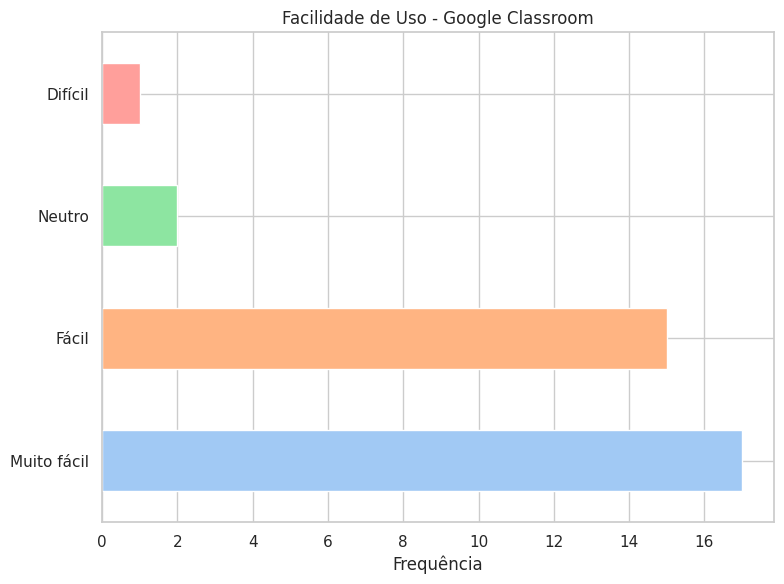

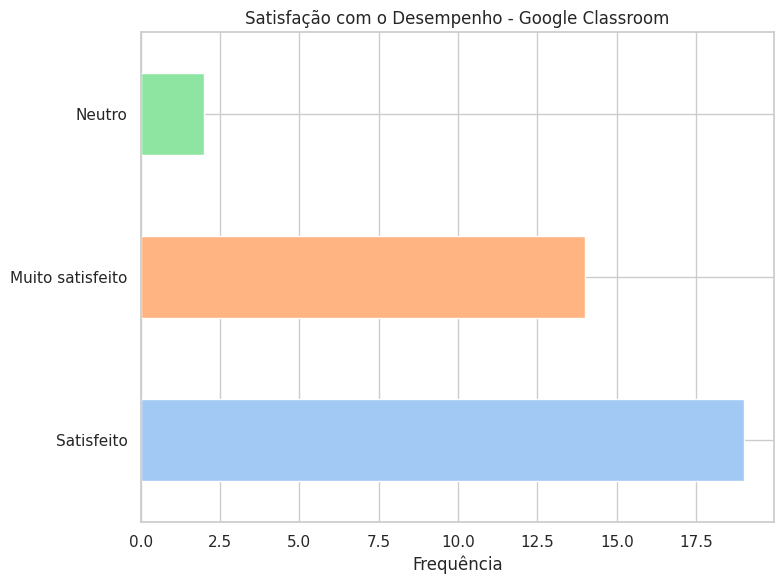

<ipython-input-2-ba990c294d0c>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index, x=value_counts.values, palette="pastel")


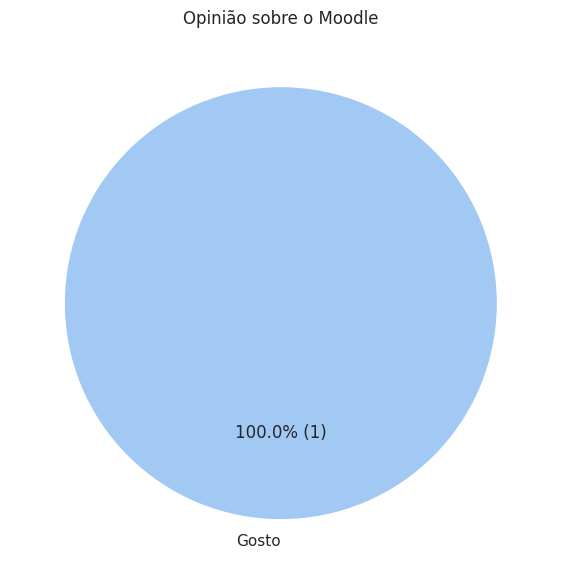

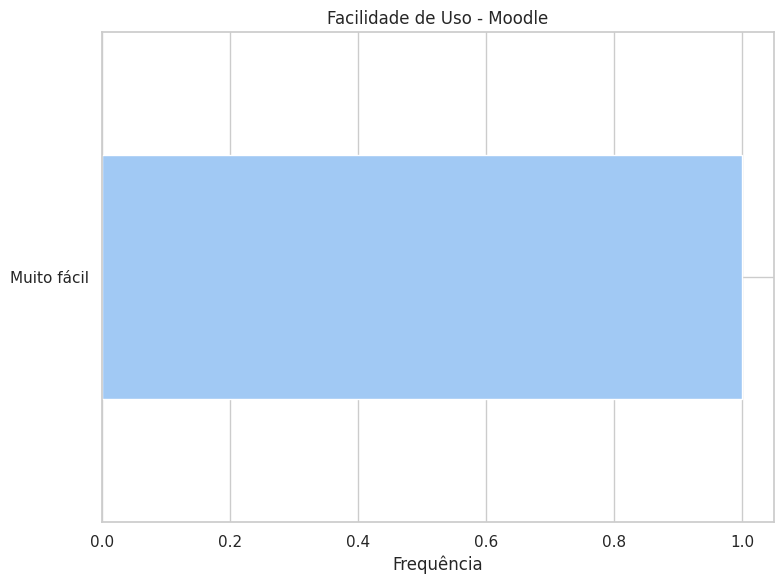

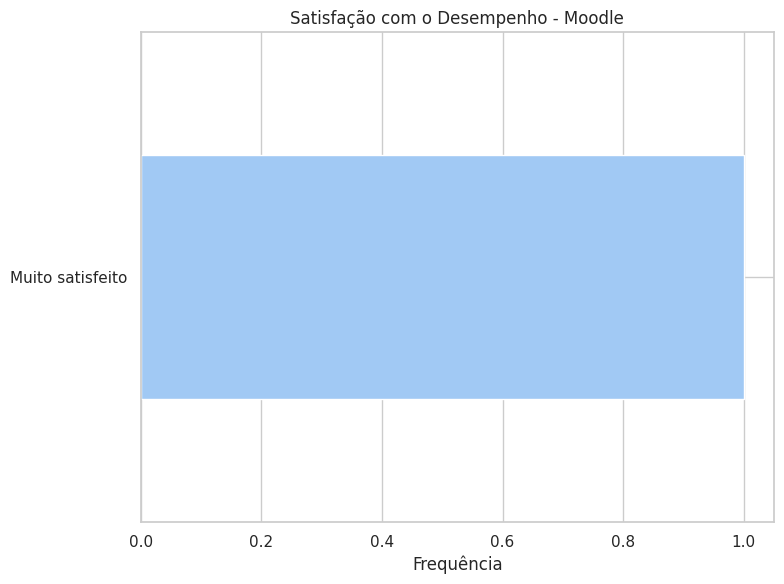

<ipython-input-2-ba990c294d0c>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index, x=value_counts.values, palette="pastel")


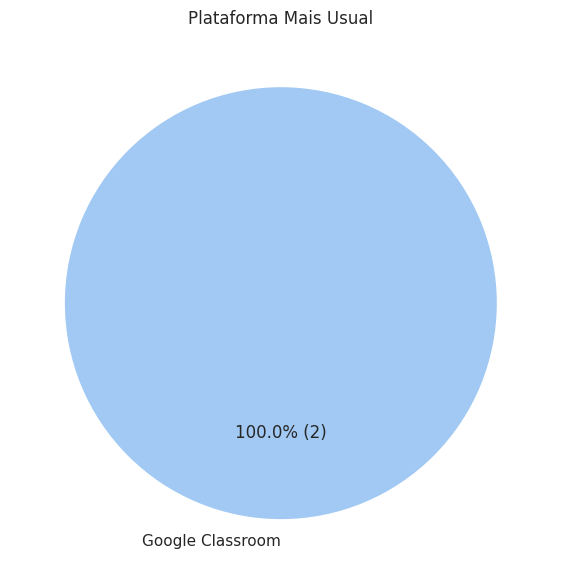

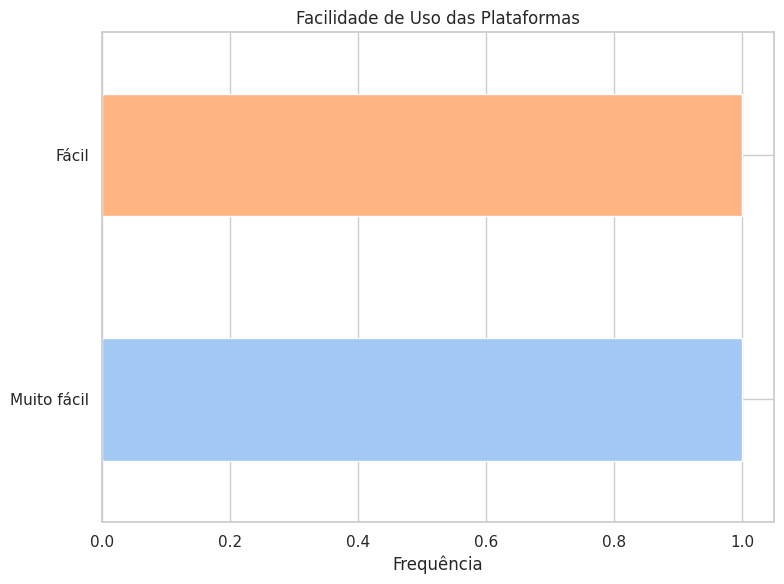

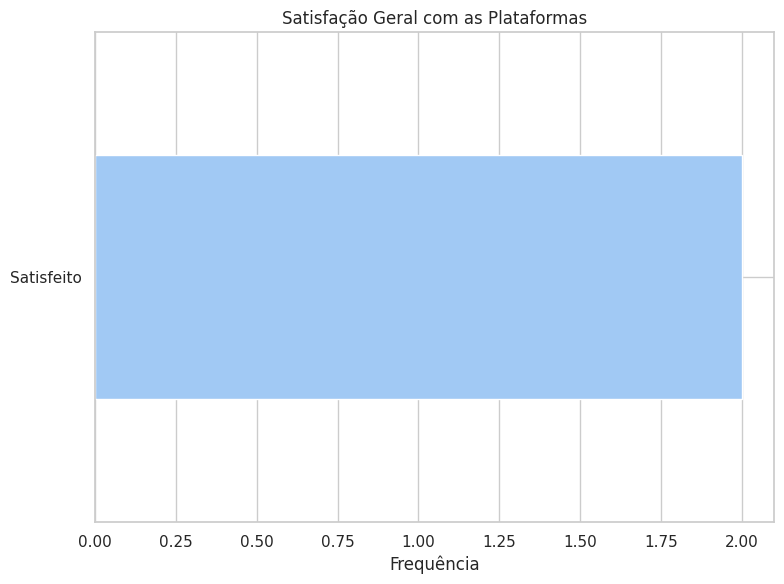

<ipython-input-2-ba990c294d0c>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index, x=value_counts.values, palette="pastel")
<ipython-input-2-ba990c294d0c>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index, x=value_counts.values, palette="pastel")


Análise concluída. Arquivo salvo como 'reports/analise_ambientes_virtuais_ensino.pdf'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# RENOMEAR O ARQUIVO DO QUESTIONARIO PARA questionario.xlsx

# Configuração de visualização
sns.set(style="whitegrid")

# Formatação da porcentagem dos gráficos de pizza
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val})'
    return my_format

# Criar gráficos de barras
def plot_bar(data, column, title, pdf):
    if column in data.columns:
        plt.figure(figsize=(8, 6))
        data[column].value_counts().plot(kind='barh', color=sns.color_palette("pastel"))
        plt.title(title)
        plt.xlabel('Frequência')
        plt.ylabel('')
        plt.tight_layout()
        pdf.savefig()
        plt.show()  # Exibir gráfico na tela
        plt.close()
    else:
        print(f"Coluna '{column}' não encontrada nos dados.") # Se não tiver os dados

# Criar gráficos de pizza
def plot_pie(data, column, title, pdf):
    if column in data.columns:
        plt.figure(figsize=(8, 6))
        values = data[column].dropna().value_counts()
        values.plot(kind='pie', autopct=autopct_format(values), startangle=90, colors=sns.color_palette("pastel"))
        plt.title(title)
        plt.ylabel('')
        plt.tight_layout()
        pdf.savefig()
        plt.show()  # Exibir gráfico na tela
        plt.close()
    else:
        print(f"Coluna '{column}' não encontrada nos dados.") # Se não tiver os dados

# Função para plotar gráficos de múltiplas escolhas
def plot_multiple_choice(data, column, title, pdf):
    if column in data.columns:
        # Explodir as respostas separadas por ';', remover entradas vazias e contar a frequência de cada resposta
        responses = data[column].dropna().str.split(';').explode().str.strip()

        # Remover entradas vazias ou inválidas
        responses = responses[responses != '']

        # Contar as respostas válidas
        value_counts = responses.value_counts()

        # Criar o gráfico
        plt.figure(figsize=(8, 6))
        sns.barplot(y=value_counts.index, x=value_counts.values, palette="pastel")

        # Ajustar o tamanho da fonte e rotacionar as etiquetas
        plt.title(title, fontsize=18)
        plt.xlabel('Frequência', fontsize=14)
        plt.ylabel('Respostas', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=10)

        plt.yticks(rotation=0)
        plt.tight_layout()

        pdf.savefig()
        plt.close()
    else:
        print(f"Coluna '{column}' não encontrada nos dados.")

# Função para criar uma página com texto
def add_text_page(pdf, text):
    plt.figure(figsize=(8, 6))
    plt.text(0.5, 0.5, text, fontsize=24, ha='center', va='center')
    plt.axis('off')
    pdf.savefig()
    plt.close()

# Função principal para gerar a análise exploratória
def generate_analysis(data, output_pdf):
    with PdfPages(output_pdf) as pdf:
        # Questões gerais
        add_text_page(pdf, 'Questões Gerais')
        plot_pie(data, '1', 'Participação na Pesquisa', pdf)
        plot_pie(data, '2', 'Nível de Estudo dos Participantes', pdf)
        plot_pie(data, '3', 'Distribuição por Faixa Etária', pdf)

        # Pergunta 4 - Frequência de uso das plataformas
        plot_pie(data, '4', 'Frequência de Uso das Plataformas', pdf)

        # Perguntas sobre Classroom
        add_text_page(pdf, 'Google Classroom')
        plot_pie(data, '5', 'Opinião sobre o Google Classroom', pdf)
        plot_bar(data, '6', 'Facilidade de Uso - Google Classroom', pdf)
        plot_bar(data, '7', 'Satisfação com o Desempenho - Google Classroom', pdf)
        plot_multiple_choice(data, '8', 'Sugestões de Melhorias - Classroom', pdf)

        # Perguntas sobre Moodle
        add_text_page(pdf, 'Moodle')
        plot_pie(data, '9', 'Opinião sobre o Moodle', pdf)
        plot_bar(data, '10', 'Facilidade de Uso - Moodle', pdf)
        plot_bar(data, '11', 'Satisfação com o Desempenho - Moodle', pdf)
        plot_multiple_choice(data, '12', 'Sugestões de Melhorias - Moodle', pdf)

        # Comparação geral
        add_text_page(pdf, 'Ambas Plataformas')
        plot_pie(data, '13', 'Plataforma Mais Usual', pdf)
        plot_bar(data, '14', 'Facilidade de Uso das Plataformas', pdf)
        plot_bar(data, '15', 'Satisfação Geral com as Plataformas', pdf)

        # Melhorias sugeridas
        plot_multiple_choice(data, '16', 'Melhorias no Moodle', pdf)
        plot_multiple_choice(data, '17', 'Melhorias no Classroom', pdf)

    print(f"Análise concluída. Arquivo salvo como '{output_pdf}'.")

# Leitura do arquivo Excel
file_path = 'dataset/questionario.xlsx'
data = pd.read_excel(file_path)

# Geração do relatório
output_pdf = 'reports/analise_ambientes_virtuais_ensino.pdf'
generate_analysis(data, output_pdf)